In [1]:
import torchvision

from torch import Tensor, cuda, device
from src.plots import plot_vae_classifier_training_result, plot_cifar_image
from src.vae.cifar_vae import VaeAutoencoderClassifier
from src.image_classifier.image_classifier import CIFAR10Classifier

device = device('cuda' if cuda.is_available() else 'cpu')

In [2]:
# convert data to a normalized torch.FloatTensor
transform = torchvision.transforms.Compose([
    torchvision.transforms.ToTensor(),
    torchvision.transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

training_data = torchvision.datasets.CIFAR10(root='../data/CIFAR10_train', train=True, download=True, transform=torchvision.transforms.ToTensor())
testing_data = torchvision.datasets.CIFAR10(root='../data/CIFAR10_test', train=False, download=True, transform=torchvision.transforms.ToTensor())

print(training_data)
print(testing_data)

input = training_data.data[:50000]
labels = training_data.targets[:50000]

Files already downloaded and verified
Files already downloaded and verified
Dataset CIFAR10
    Number of datapoints: 50000
    Root location: ../data/CIFAR10_train
    Split: Train
    StandardTransform
Transform: ToTensor()
Dataset CIFAR10
    Number of datapoints: 10000
    Root location: ../data/CIFAR10_test
    Split: Test
    StandardTransform
Transform: ToTensor()


In [5]:
# Train VAE
vae = VaeAutoencoderClassifier(dim_encoding=64).to(device)

vae_classifier_model, vae_loss_li = vae.train_model(
    training_data=training_data,
    batch_size=50,
    beta=1,
    epochs=3,
    learning_rate=0.1
)
for loss in vae_loss_li:
    print(loss)

Finished epoch:  1
Finished epoch:  2
Finished epoch:  3
11110.29296875
9462.4248046875
10206.5302734375
8786.83984375
8392.9638671875
8945.6123046875
7345.18798828125
9407.08203125
9884.8798828125
9212.6494140625
10253.3779296875
8612.216796875
7756.28759765625
8291.4326171875
9093.8720703125
8164.87255859375
8048.20751953125
8291.8310546875
9028.478515625
7408.89013671875
7285.93408203125
8373.1171875
9333.2685546875
9542.271484375
8919.83203125
8593.6650390625
9160.7060546875
8375.9541015625
8534.48046875
8783.3408203125


(5, 32, 32, 3)
<class 'numpy.ndarray'>
torch.Size([5, 32, 32, 3])
<class 'torch.Tensor'>


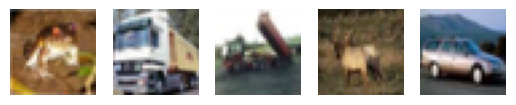

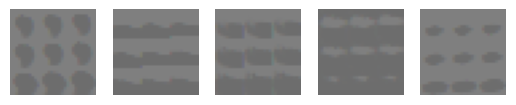

In [7]:
# plot generated data
image_tensor = vae.generate_data(n_samples=5)
samples = training_data.data[:5]

assert image_tensor.shape == samples.shape
print(samples.shape)
print(type(samples))
plot_cifar_image(samples)

print(image_tensor.shape)
print(type(image_tensor))

plot_cifar_image(image_tensor.cpu().detach().numpy())

In [5]:
# move tensors to cpu before converting to np array
np_classifier_accuracy_li = []
np_classifier_loss_li = []
np_vae_loss_li = []
np_kl_loss_li = []

for output in classifier_accuracy_li:
    if isinstance(output, Tensor):
        np_classifier_accuracy_li.append(output.cpu().detach().numpy())

for output in classifier_loss_li:
    if isinstance(output, Tensor):
        np_classifier_loss_li.append(output.cpu().detach().numpy())
        
for output in vae_loss_li:
    if isinstance(output, Tensor):
        np_vae_loss_li.append(output.cpu().detach().numpy())

for output in kl_loss_li:
    if isinstance(output, Tensor):
        np_kl_loss_li.append(output.cpu().detach().numpy())


In [6]:
# plot results
plot_vae_classifier_training_result(
    input=input,
    labels=labels,
    vae_model_classifier=vae_classifier_model,
    vae_loss_li=np_vae_loss_li,
    total_losses=total_losses, 
    classifier_accuracy_li=np_classifier_accuracy_li, 
    classifier_loss_li=np_classifier_loss_li,
    kl_loss_li=np_kl_loss_li
)

In [3]:
# train classifier for performance evaluation
classifier = CIFAR10Classifier()
if cuda.is_available():
    classifier.cuda()

classifier.train_model(training_data, batch_size=32, learning_rate=0.01, epochs=2)
accuracy = classifier.test_model(testing_data)
print("Test accuracy: ", accuracy)

Epoch done:  1
Epoch done:  2
Epoch done:  3
Epoch done:  4
Epoch done:  5
Epoch done:  6
Epoch done:  7
Epoch done:  8
Epoch done:  9
Epoch done:  10
Epoch done:  11
Epoch done:  12
Epoch done:  13
Epoch done:  14
Epoch done:  15
Epoch done:  16
Epoch done:  17
Epoch done:  18
Epoch done:  19
Epoch done:  20
Test accuracy:  0.7442


In [11]:
# test quality of images
x, y = vae.generate_data(n_samples=10000)

assert x.shape[0] == y.shape[0]
print("Number of images: ", x.shape[0])

accuracy = classifier.test_model_syn_img_label(x, y)
print("Accuracy: ", accuracy)

In [10]:
# # Determine FID
# # generate 500 images
# syn_input, _ = vae.generate_data(n_samples=500)
# input = input[:500]
# 
# input_rgb = input.view(-1, 1, 28, 28).repeat(1, 3, 1, 1)
# syn_input_rgb = syn_input.view(-1, 1, 28, 28).repeat(1, 3, 1, 1)
# 
# # compute FID score
# fid_score = frechet_inception_distance(input_rgb, syn_input_rgb)
# print("Frechet Inception Distance: ", fid_score)